In [89]:
import xarray as xr
import wrf
from netCDF4 import Dataset
import numpy as np
import glob
import hvplot.xarray
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import tqdm
import pyart
import datetime as dt
from pyproj import CRS, Transformer


In [215]:
#Load WRF output files
wrflist = [Dataset(f) for f in np.sort(glob.glob("/g/data/w40/ab4502/WRF_simulations/tasman_d04_20231015_20231016_ramssa/highres_d01_2023-10-*"))]
times = wrf.extract_times(wrflist,wrf.ALL_TIMES)

In [216]:
#Look at available variables
wrflist[0].variables.keys()

dict_keys(['Times', 'XLAT', 'XLONG', 'U', 'V', 'W', 'PH', 'PHB', 'T', 'THM', 'P', 'PB', 'PSFC', 'U10', 'V10', 'XTIME', 'QVAPOR', 'QCLOUD', 'QRAIN', 'QICE', 'QSNOW', 'QGRAUP', 'QHAIL', 'HGT', 'T00', 'P00', 'RAINNC', 'REFL_10CM', 'OLR', 'XLAT_U', 'XLONG_U', 'XLAT_V', 'XLONG_V', 'WSPD10MAX', 'W_UP_MAX', 'W_DN_MAX', 'REFD_MAX', 'AFWA_CAPE'])

In [217]:
ctt = wrf.getvar(wrflist,"ctt",wrf.ALL_TIMES,units="K",fill_nocloud=True)

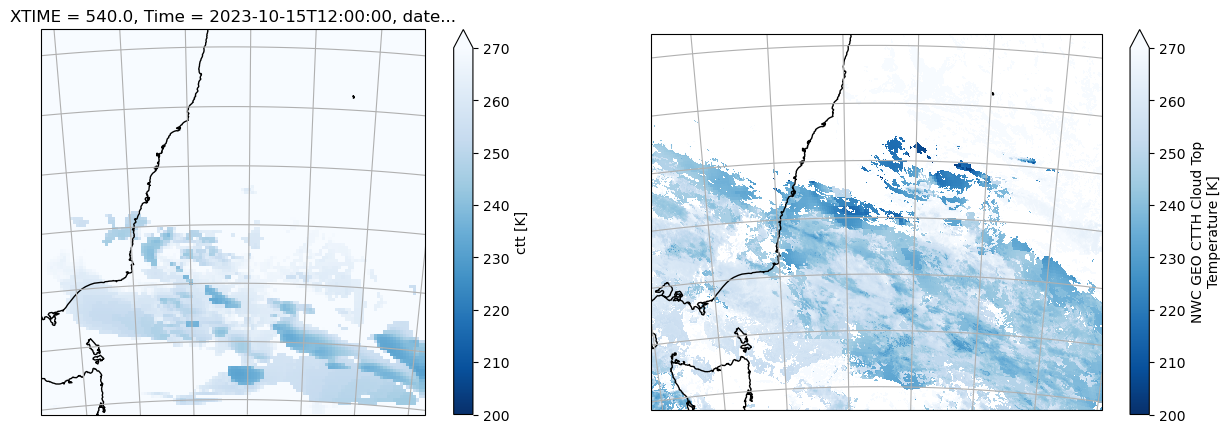

In [226]:
t=dt.datetime(2023,10,15,12,0)

geos_proj = ccrs.Geostationary(central_longitude=obs.attrs["centre_projection_longitude"],satellite_height=35785863)
wrf_proj = wrf.get_cartopy(ctt)

plt.figure(figsize=[16,5])
ax1=plt.subplot(1,2,1,projection=wrf_proj)
ax1.gridlines()
ax1.coastlines()
ctt.sel(Time=t.strftime("%Y-%m-%d %H:%M")).plot(ax=ax1,x="XLONG",y="XLAT",cmap=plt.get_cmap("Blues_r"),vmin=200,vmax=270,transform=ccrs.PlateCarree())

obs = xr.open_dataset("/g/data/rv74/satellite-products/arc/der/himawari-ahi/cloud/ctth/2023/10/15/S_NWC_CTTH_HIMA09_HIMA-N-NR_"+t.strftime("%Y%m%dT%H%M%S")+"Z.nc")
ctth_tempe = obs.ctth_tempe.sel(nx=slice(0,3e6),ny=slice(-3e6,-5e6))
ax = plt.subplot(1,2,2,projection=wrf_proj)
ctth_tempe.plot(ax=ax,cmap=plt.get_cmap("Blues_r"),vmin=200,vmax=270,transform=geos_proj)
extent = [wrflist[0]["XLONG"][:].min(),wrflist[0]["XLONG"][:].max(),wrflist[0]["XLAT"][:].min(),wrflist[0]["XLAT"][:].max()]
ax.set_extent(extent)
ax.gridlines()
ax.coastlines()
